In [12]:
import sys
import pandas as pd
sys.path.append('../../')
from SynRBL.rsmi_utils import load_database
from SynRBL.SynVis import ReactionVisualizer
visualizer =    ReactionVisualizer()

In [48]:
uspto_diff = load_database('../../Data/Validation_set/USPTO_diff/MCS/MCS_Impute.json.gz')
uspto_unb = load_database('../../Data/Validation_set/USPTO_unbalance_class/MCS/MCS_Impute.json.gz')
uspto_random = load_database('../../Data/Validation_set/USPTO_random_class/MCS/MCS_Impute.json.gz')
df = pd.DataFrame(uspto_diff)
df2 = pd.DataFrame(uspto_unb)
df3 = pd.DataFrame(uspto_random)

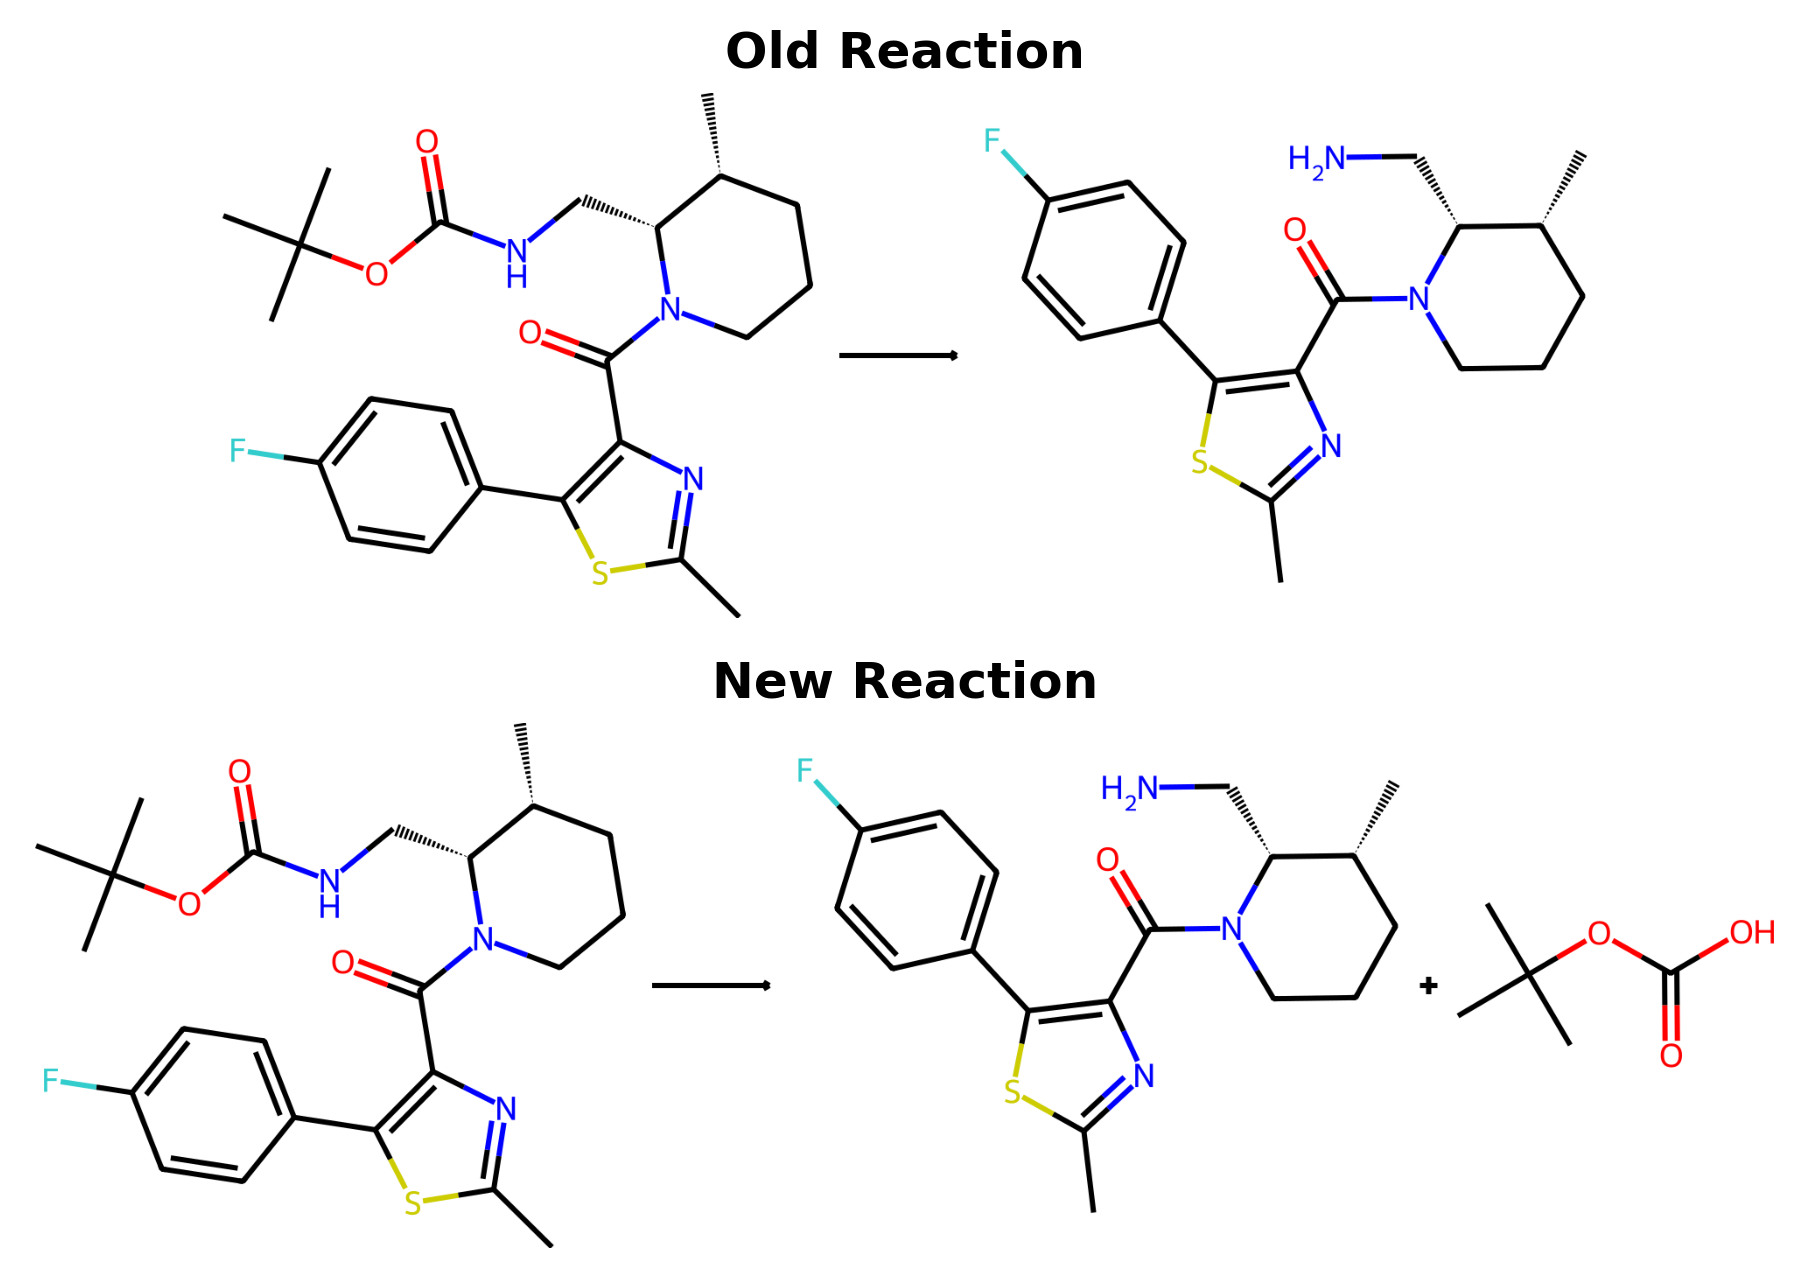

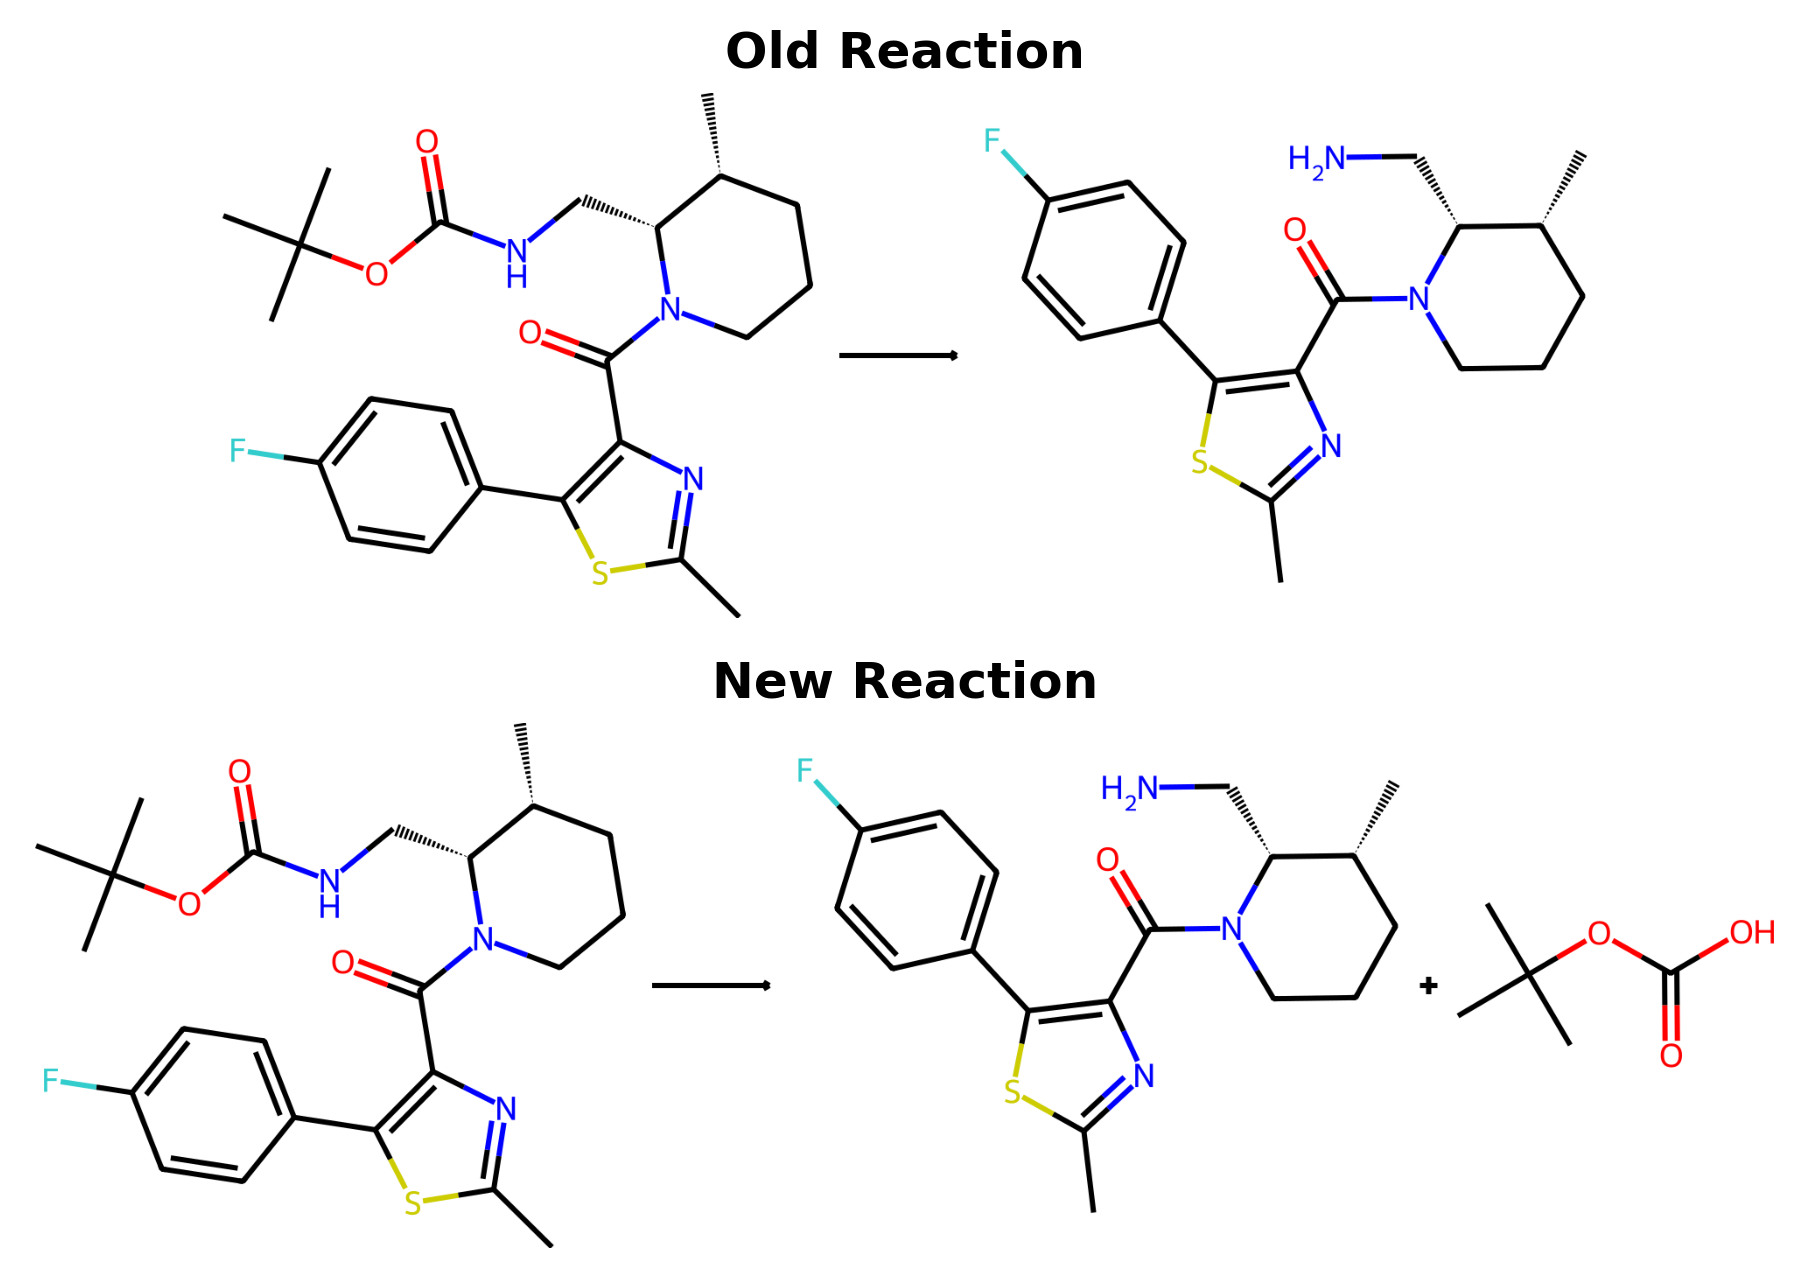

In [22]:
visualizer.plot_reactions(df.iloc[0,:], 'old_reaction', 'new_reaction', compare=True)

In [46]:
import matplotlib.pyplot as plt
import tempfile
from reportlab.lib.pagesizes import letter, landscape
from reportlab.pdfgen import canvas

def save_reactions_to_pdf(df, pdf_filename, visualizer):
    c = canvas.Canvas(pdf_filename, pagesize=landscape(letter))
    page_width, page_height = landscape(letter)

    c.setFont("Helvetica-Bold", 14)

    for index, row in df.iterrows():
        # Visualize reactions
        #fig, ax = plt.subplots()  # Create a new figure and axes
        fig= visualizer.plot_reactions(row, 'old_reaction', 'new_reaction', compare=True)

        with tempfile.NamedTemporaryFile(delete=False, suffix=".png") as img_temp:
            fig.savefig(img_temp, format='PNG')  # Save the figure to the temp file
            img_temp.flush()

            img_width, img_height = 1000, 600
            x = (page_width - img_width) / 2
            y = (page_height - img_height) / 2 - 50

            title = f"Reaction Index: {index}"
            title_x = (page_width - c.stringWidth(title, "Helvetica-Bold", 14)) / 2
            title_y = y + img_height + 30
            c.drawString(title_x, title_y, title)

            c.drawImage(img_temp.name, x, y, width=img_width, height=img_height, mask='auto')
            c.showPage()

        plt.close(fig)  # Close the figure to free up memory

    c.save()
    print(f"Saved reactions to {pdf_filename}")


In [47]:
pdf_filename = "USPTO_diff.pdf"
visualizer = ReactionVisualizer()
save_reactions_to_pdf(df.iloc[:,:], pdf_filename, visualizer)

Saved reactions to USPTO_diff.pdf


In [49]:
pdf_filename = "USPTO_unb.pdf"
visualizer = ReactionVisualizer()
save_reactions_to_pdf(df2.iloc[:,:], pdf_filename, visualizer)

Saved reactions to USPTO_unb.pdf


In [50]:
pdf_filename = "USPTO_random.pdf"
visualizer = ReactionVisualizer()
save_reactions_to_pdf(df3.iloc[:,:], pdf_filename, visualizer)

Saved reactions to USPTO_random.pdf
